In [2]:
import numpy as np 
import math
from scipy.stats import bernoulli
from scipy.stats import beta
from confseq.betting import hedged_cs, dKelly_cs
from confseq.predmix import predmix_hoeffding_cs, predmix_empbern_twosided_cs
import matplotlib.pyplot as plt 
from scipy.optimize import minimize

In [3]:
m1, m2 = 0.8, 0.5
size = 4000
X1 = bernoulli.rvs(m1, size=size)
X2 = bernoulli.rvs(m2, size=size)

In [4]:
def sequential_test(yt0, yt1, z, lmbda):
 
    gt = yt0 - yt1
    
    constant = 2/(2 - math.log(3))
    constat_2 = z[-1]/(1 + np.linalg.norm(z)**2)
    lmda_t = max((min(lmbda - constant*constat_2, 2/3)), -2/3)
    z_t = gt/(1 - lmda_t*gt)
    return lmda_t, z_t, gt


In [12]:
steps_until_decision = []
delta =[]
wealths = []
for j in range(1,9):
    # m1, m2 = 0.8, 0.5
    size = 200
    X1 = bernoulli.rvs(0.5 + 0.05*j, size=size)
    X2 = bernoulli.rvs(0.5 - 0.05*j, size=size)
    delta.append(0.1*j)
    # Run simulation 
    current_wealth = 1
    lmbda = 0
    z = np.array([0])
    b = bernoulli.rvs(0.5, size=size)
    Y = np.where(b == 1, X1, X2)
    alpha = 0.05
    u = np.random.uniform()
    t = 0
    wealth = []
    for index in range(len(X1)): 

        
        lmda_t, z_t, gt = sequential_test(X1[index], X2[index], z, lmbda)
        new_wealth = current_wealth*(1 - lmda_t*gt)
        # print(new_wealth)
        if new_wealth > 1/alpha:
            print("Null rejected")
            break
        z = np.concatenate((z, [z_t]))
        current_wealth = new_wealth
        wealth.append(current_wealth)
        lmbda = lmda_t
        t += 1
    wealths.append(wealth)
    steps_until_decision.append(t)
    if current_wealth > u/alpha:
        print("Null rejected")
    print("Null not rejected")

Null rejected
Null not rejected
Null rejected
Null rejected
Null not rejected
Null rejected
Null rejected
Null not rejected
Null rejected
Null rejected
Null not rejected
Null rejected
Null rejected
Null not rejected
Null rejected
Null rejected
Null not rejected
Null rejected
Null not rejected
Null rejected
Null not rejected


IndexError: list index out of range

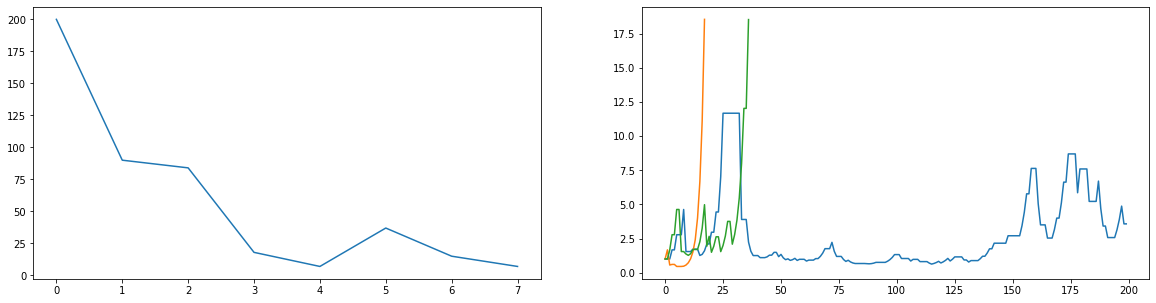

In [13]:
# c_wheel = ['navy', 'tab:olive', 'purple', 'blue', 'yellow']

fig, ax = plt.subplots(1,2, figsize=(20,5))
ax1, ax2 = ax.ravel()
    
# Kelly betting 
# ax1.fill_between(np.arange(len(X1)), lb_kelly1, ub_kelly1, label='CS for $\mu_0$', alpha=0.4)
# ax1.fill_between(np.arange(len(X1)), lb_kelly2, ub_kelly2, color='tab:olive', label='CS for $\mu_1$', alpha=0.4)
# split = find_split(ub_kelly2, lb_kelly1)
# ax1.axvline(split, c='k', label=f'Rejection time (={split})')
ax1.plot(steps_until_decision)


# Hoeffding 
# ax2.fill_between(np.arange(len(X1)), lb_hoeff1, ub_hoeff1, color='green', label='CS for $\mu_0$', alpha=0.4)
# ax2.fill_between(np.arange(len(X2)), lb_hoeff2, ub_hoeff2, color='orange', label='CS for $\mu_1$', alpha=0.4)
# split = find_split(ub_hoeff2, lb_hoeff1)
# ax2.axvline(split, c='k', label=f'Rejection time (={split})')\
ax2.plot(wealths[0], label = '$\mu_0 - \mu_1 = 0$')
ax2.plot(wealths[3], label = '$\mu_0 - \mu_1 = 0.3$')
ax2.plot(wealths[5], label = '$\mu_0 - \mu_1 = 0.5$')
ax2.plot(wealths[8], label = '$\mu_0 - \mu_1 = 0.7$')



# ax1.axhline(m1, ls='--', c='gray')
# ax2.axhline(m1, ls='--', c='gray')

# ax1.axhline(m2, ls='--', c='gray')
# ax2.axhline(m2, ls='--', c='gray')

# ax1.legend(fontsize=12, loc='upper left')
ax2.legend(fontsize=12, loc='upper right')

ax1.set_title(f'Number of trials before rejection', fontsize=14)
ax2.set_title(f'Wealth by iteration', fontsize=14)
fig.suptitle("Betting-style sequential test", fontsize=14)

ax1.set_xlabel('$\mu_0 - \mu_1$')
# ax1.set_xticklabels([0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
ax1.set_ylabel('Number of trials')
# ax1.set_xscale('log')
ax2.set_yscale('log')
# ax2.set_xscale('log')
ax2.set_xlabel('Number of trials')
ax2.set_ylabel('Wealth')
# ax1.set_ylim((0,1))
# ax2.set_ylim((0,1))

# plt.savefig(f'seq_test_mu0_mu1.png', dpi=300, bbox_inches='tight')


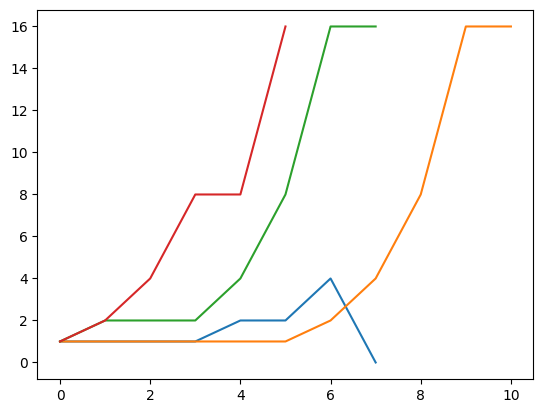

In [359]:
plt.plot(wealths[0], label = '$\mu_0 - \mu_1 = 0$')
plt.plot(wealths[3], label = '$\mu_0 - \mu_1 = 0.3$')
plt.plot(wealths[5], label = '$\mu_0 - \mu_1 = 0.5$')
plt.plot(wealths[8], label = '$\mu_0 - \mu_1 = 0.7$')

In [330]:
def mean_function_1(indexes):
    return [-math.e**i for i in indexes]
def mean_function_2(indexes):
    return [math.e**i for i in indexes]

In [332]:
steps_until_decision = []
delta =[]
# for j in range(9):
    # m1, m2 = 0.8, 0.5
size = 600
std_dev = 1
indices = np.arange(-5, 5)
mean_values_1 = mean_function_1(indices)    
mean_values_2 = mean_function_2(indices)    
X1 = np.random.normal(mean_values_1, std_dev)
X2 = np.random.normal(mean_values_2, std_dev)
delta.append(0.1*j)
# Run simulation 
current_wealth = 1
lmbda = 0
z = np.array([0])
b = bernoulli.rvs(0.5, size=size)
alpha = 0.05
u = np.random.uniform()
t = 0
wealth_e = []
for index in range(len(X1)): 

    
    lmda_t, z_t, gt = sequential_test(X1[index], X2[index], z, lmbda)
    new_wealth = current_wealth*(1 - lmda_t*gt)
    wealth_e.append(new_wealth)
    # print(new_wealth)
    if new_wealth > 1/alpha:
        print("Null rejected")
        break
    z = np.concatenate((z, [z_t]))
    current_wealth = new_wealth
    lmbda = lmda_t
    t += 1
steps_until_decision.append(t)
if current_wealth > u/alpha:
    print("Null rejected")
print("Null not rejected")

Null rejected
Null not rejected
